In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(housing.data, housing.target, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5245109352606162

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X_iris_full, X_iris_test, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_iris_train, X_iris_valid, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter = 10_000,random_state=42)
pipeline_clf = make_pipeline(StandardScaler(), mlp_clf)
pipeline_clf.fit(X_iris_train, y_iris_train)
y_pred = pipeline_clf.predict(X_iris_test)
accuracy_score(y_iris_test, y_pred)

1.0

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0 # Scaling from 0-255 to 0-1

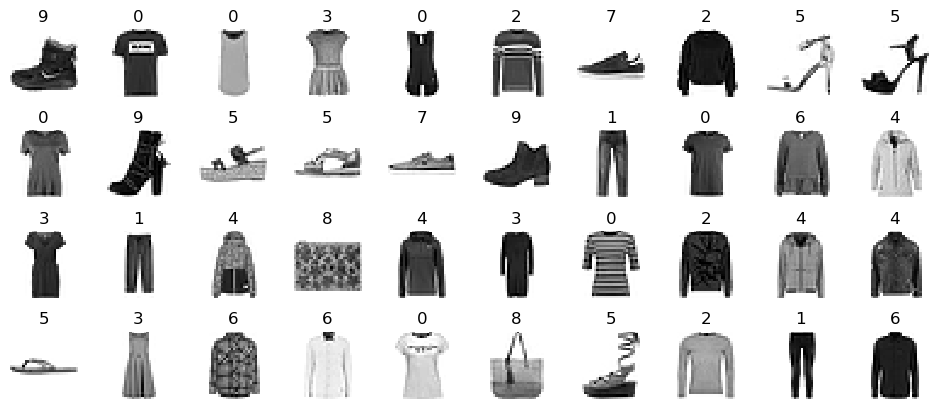

In [6]:
n_rows = 4 
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
class_names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Jacket", "Sandal", "Shirt", "Sneaker","Bag", "Boot"]

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


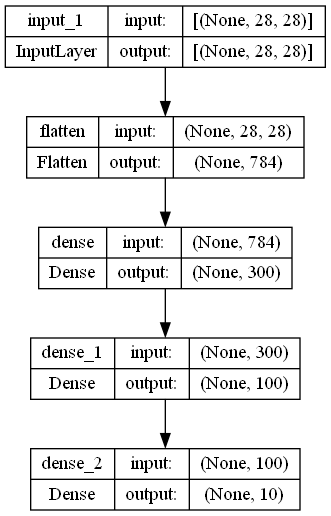

In [10]:
tf.keras.utils.plot_model(model)
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [11]:
model.layers

In [12]:
output_layer = model.get_layer('dense_2')
weights, biases = output_layer.get_weights()
weights

array([[ 9.51477289e-02, -2.02503651e-02,  1.18193746e-01,
         1.06503844e-01, -7.71606416e-02, -1.93073407e-01,
         1.44052893e-01, -1.51776969e-01, -4.43277359e-02,
        -5.36826253e-02],
       [ 1.21515393e-01,  1.65157109e-01, -1.82327494e-01,
        -1.23074882e-01,  1.35414422e-01,  1.27355039e-01,
         2.42321789e-02,  1.97734475e-01,  2.16918290e-01,
         1.36855036e-01],
       [-2.17107400e-01, -1.46055028e-01, -1.15967557e-01,
        -5.88869005e-02,  4.26700115e-02,  3.02318037e-02,
        -2.65502930e-02,  1.84512883e-01,  1.81617945e-01,
        -1.72377303e-01],
       [ 2.04620242e-01,  1.40917629e-01, -4.01206315e-02,
         1.28176510e-01,  3.29012871e-02,  2.05291957e-01,
         2.03237802e-01,  6.70959651e-02,  2.28026301e-01,
        -2.20739573e-01],
       [ 1.23263896e-03,  2.71229744e-02,  2.54914165e-04,
         1.48016065e-02,  1.94484681e-01,  2.22827107e-01,
        -6.23499006e-02, -1.37621671e-01, -4.29379493e-02,
        -3.

In [13]:
print(weights.shape)
print(biases.shape)

(100, 10)
(10,)


In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7194 - accuracy: 0.7643 - val_loss: 0.5035 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4857 - accuracy: 0.8315 - val_loss: 0.4502 - val_accuracy: 0.8364
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4380 - accuracy: 0.8462 - val_loss: 0.4189 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4125 - accuracy: 0.8553 - val_loss: 0.3939 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3913 - accuracy: 0.8625 - val_loss: 0.3835 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3750 - accuracy: 0.8679 - val_loss: 0.3863 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3620 - accuracy: 0.8719 - val_loss: 0.3690 - val_accuracy:

In [17]:
print(history.params)
print(history.epoch)
pd.DataFrame(history.history).head(2)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


,loss,accuracy,val_loss,val_accuracy
0,0.719396,0.764327,0.503523,0.8256
1,0.485730,0.831473,0.450151,0.8364


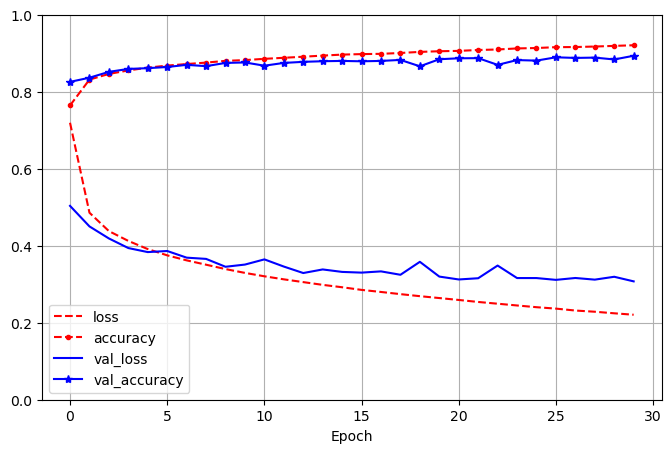

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5), ylim=[0,1], grid=True, xlabel="Epoch", style=['r--', 'r--.', 'b-','b-*'])
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8859


[0.32871636748313904, 0.8859000205993652]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 63ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

prediction:  ['Boot', 'Pullover', 'Pants']


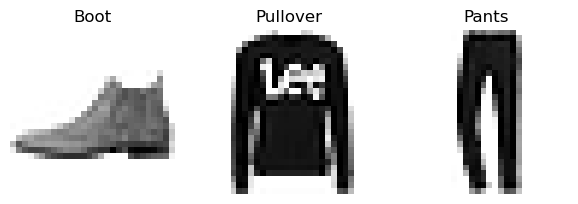

In [21]:
plt.figure(figsize=(7.2, 2.4))
y_pred = y_proba.argmax(axis=-1)
print("prediction: ", [class_names[y] for y in y_pred])
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 8.6240 - root_mean_squared_error: 2.9367 - val_loss: 8.4204 - val_root_mean_squared_error: 2.9020
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.3017 - root_mean_squared_error: 2.8813 - val_loss: 8.3919 - val_root_mean_squared_error: 2.8971
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2839 - root_mean_squared_error: 2.8782 - val_loss: 8.4200 - val_root_mean_squared_error: 2.9019
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2777 - root_mean_squared_error: 2.8771 - val_loss: 8.4366 - val_root_mean_squared_error: 2.9047
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2698 - root_mean_squared_error: 2.8757 - val_loss: 8.3918 - val_root_mean_squared_error: 2.8971
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2599 - root_mean_squared_error: 2.8740 - val_loss: 8